In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [10]:
df = pd.read_csv('2017Release_5.csv', encoding='ANSI')

In [14]:
df.columns

Index(['Column1', '舉發單位', '車號', '違規車種', '車籍車種', '車籍簡式車種', '人車雜湊', '出生年',
       '舉發類別', '規責對象', '條款1', '條款2', '條款3', '條款4', '違規日期', '處罰機關代碼', '舉發異常狀態',
       '應繳金額', '違規地點', '裁決狀態', '異動別', '異議狀態', '特殊註記', '性別'],
      dtype='object')

## Month

In [16]:
list1=[]
for i in range(1,13):
    list1.append(df[df['違規日期']<='2017/'+str(i)+'/31'].違規日期.count())

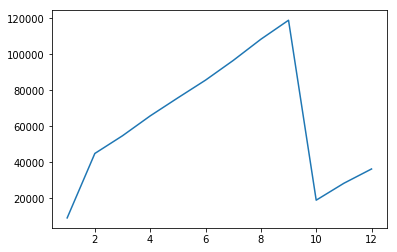

In [18]:
arr1 = np.array(list1)
x = np.linspace(1, 12, 12)
plt.plot(x, arr1)

## Hours

,Column1
hours,
00,1673
01,1771
02,1488
03,1304
04,1102
05,1234
06,1442
07,1276
08,1419


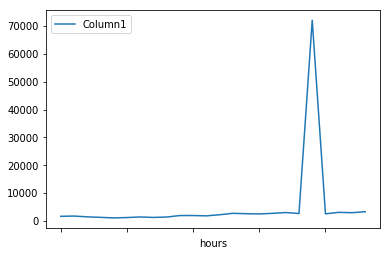

In [27]:
hourlist=[]
for each in df['違規日期'].tolist():
    hourlist.append(each.split(' ')[1][:2])
df['hours'] = hourlist
df_hour = df[['hours', 'Column1']]
df_hour.groupby(['hours']).count().plot()
df_hour.groupby(['hours']).count()

## 星期

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


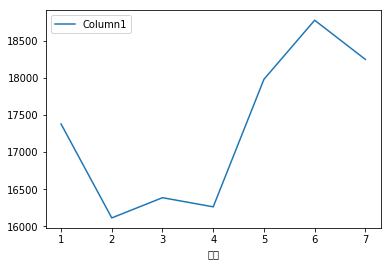

In [29]:
#### df.日期 = datetime.datetime(df.日期).strftime('%W')
weekList = []
for each in df.違規日期.tolist():
    dateStr = each.split(' ')[0]
    year,mon,date = [int(i) for i in dateStr.split('/')]
    each = datetime.datetime(year, mon, date).strftime('%a')
    weekList.append(each)
df['星期'] = np.array(weekList)
df_week = df[['Column1', '星期']]

df_week.loc[df_week.星期=='Fri', '星期'] = 5
df_week.loc[df_week.星期=='Mon', '星期'] = 1
df_week.loc[df_week.星期=='Sat', '星期'] = 6
df_week.loc[df_week.星期=='Sun', '星期'] = 7
df_week.loc[df_week.星期=='Thu', '星期'] = 4
df_week.loc[df_week.星期=='Tue', '星期'] = 2
df_week.loc[df_week.星期=='Wed', '星期'] = 3


df_week.groupby(['星期']).count().plot()